<a href="https://colab.research.google.com/github/AndreyGolovin85/Andrey/blob/master/k-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задание 3
Сгенерируйте набор данных и проведите его кластеризацию по методу k-means с использованием разных метрик. Результаты кластеризации визуализируйте.

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cls = 3
X, y = make_blobs(n_samples=200, centers=cls, n_features=2, random_state=60)

Воспользуемся библиотекой pyclustering для решения задачи кластеризации вместо sklearn так как в последней отсутствует возможность установить свою метрику по расчету расстояния между данными.

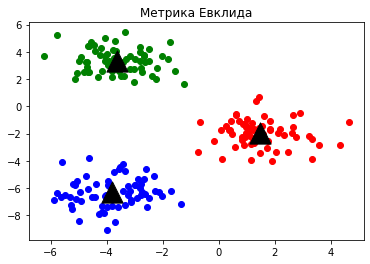

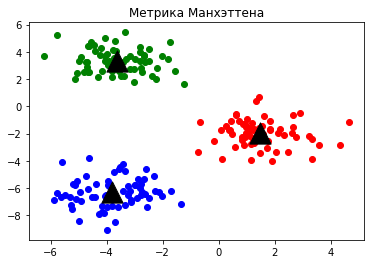

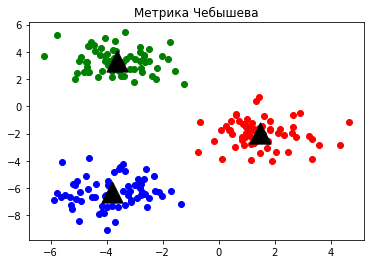

In [7]:
import random as rd
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import type_metric, distance_metric

#расстояние евклида
def euclid(u,v):
    return sum([(u[i]-v[i])**2 for i in range(len(v))])

#расстояние манхэттена
def manhetten(u,v):
    return sum([abs(u[i]-v[i]) for i in range(len(v))])

#расстояние чебышева
def chebyshev(u,v):
    return max([abs(u[i]-v[i]) for i in range(len(v))])

metric1 = distance_metric(type_metric.USER_DEFINED, func=euclid)
metric2 = distance_metric(type_metric.USER_DEFINED, func=manhetten)
metric3 = distance_metric(type_metric.USER_DEFINED, func=chebyshev)

centers = [[rd.random(),rd.random()] for i in range(cls)];
titles = ['Метрика Евклида','Метрика Манхэттена','Метрика Чебышева']

for i,L in enumerate([metric1,metric2,metric3]):
    kmeans_instance = kmeans(X, centers, metric=L)
    kmeans_instance.process()
    clusters = kmeans_instance.get_clusters() #получаем кластеры
    centers = kmeans_instance.get_centers() #получаем центры кластеров
    colors = ['r','g','b']
    for idx,cluster in enumerate(clusters):
        for j in cluster:
            plt.scatter(X[j][0],X[j][1],color=colors[idx])
    for c in centers:
        plt.scatter(c[0],c[1],color=['k'],s=450,marker='^')
    plt.title(titles[i])
    plt.show()